In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Customer Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,2985,2985.0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,5695,18895.0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,5385,10815.0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),423,184075.0,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,707,15165.0,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

np.int64(11)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,3517.437456,126251.908419
std,0.368612,24.559481,3634.996251,192523.026544
min,0.000000,0.000000,19.000000,19.000000
25%,0.000000,9.000000,647.500000,7562.000000
50%,0.000000,29.000000,1885.000000,36769.000000
75%,0.000000,55.000000,7015.000000,143010.000000
max,1.000000,72.000000,11875.000000,867245.000000


In [17]:
df["customerID"].duplicated().sum()


np.int64(0)

# convert 0 and 1 values of senior citizen to yes/no 

In [19]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [22]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,2985,2985.0,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,5695,18895.0,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,5385,10815.0,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),423,184075.0,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,707,15165.0,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,9965,8205.0,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),891,19494.0,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,2975,3019.0,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1048,304605.0,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),5615,348795.0,No


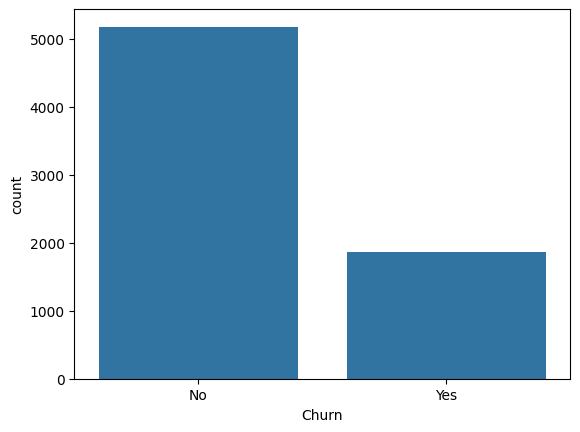

In [26]:
sns.countplot(x='Churn',data=df)
plt.show()

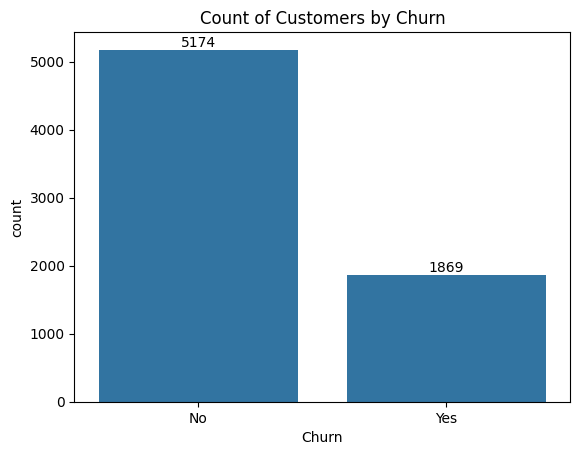

In [40]:
ax = sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [30]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
# plt.pie(df["Churn"])
# plt.show()

,Churn
Churn,
No,5174
Yes,1869


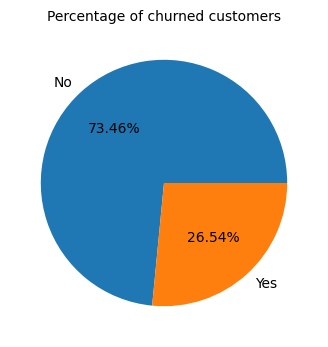

In [3]:
plt.figure(figsize=(4,4)) #change size circle
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churned customers",fontsize=10)
plt.show()


In [ ]:
# from the given pie chart we can conclude that 26.54% of our customers have churned out
# not let's explore the reasonbe

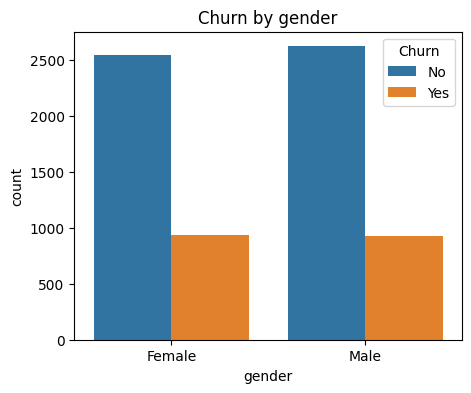

In [53]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by gender")
plt.show()

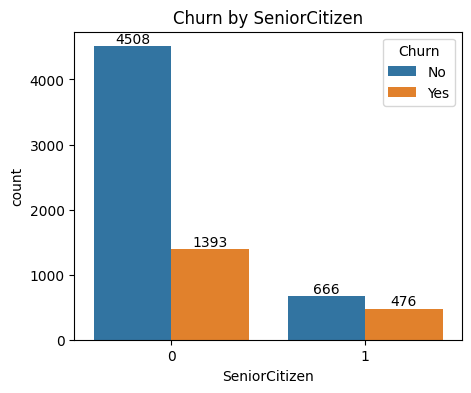

In [7]:
plt.figure(figsize=(5,4))
ax= sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by SeniorCitizen")
plt.show()

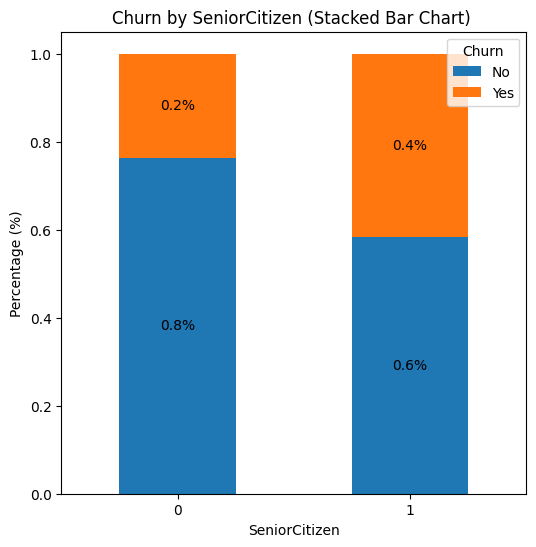

In [4]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

fig,ax=plt.subplots(figsize=(6,6))
total_counts.plot(kind='bar',stacked=True,ax=ax,color=['#1f77b4','#ff770e'])
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2,y+height/2, f'{height:.1f}%',ha='center',va='center')

plt.title('Churn by SeniorCitizen (Stacked Bar Chart) ')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn',loc='upper right')

plt.show()

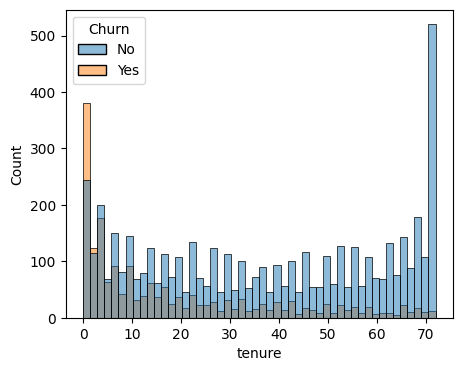

In [2]:
plt.figure(figsize=(5,4))
sns.histplot(x="tenure",data=df,bins=50,hue='Churn')
plt.show()

# people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

In [8]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
pip install 

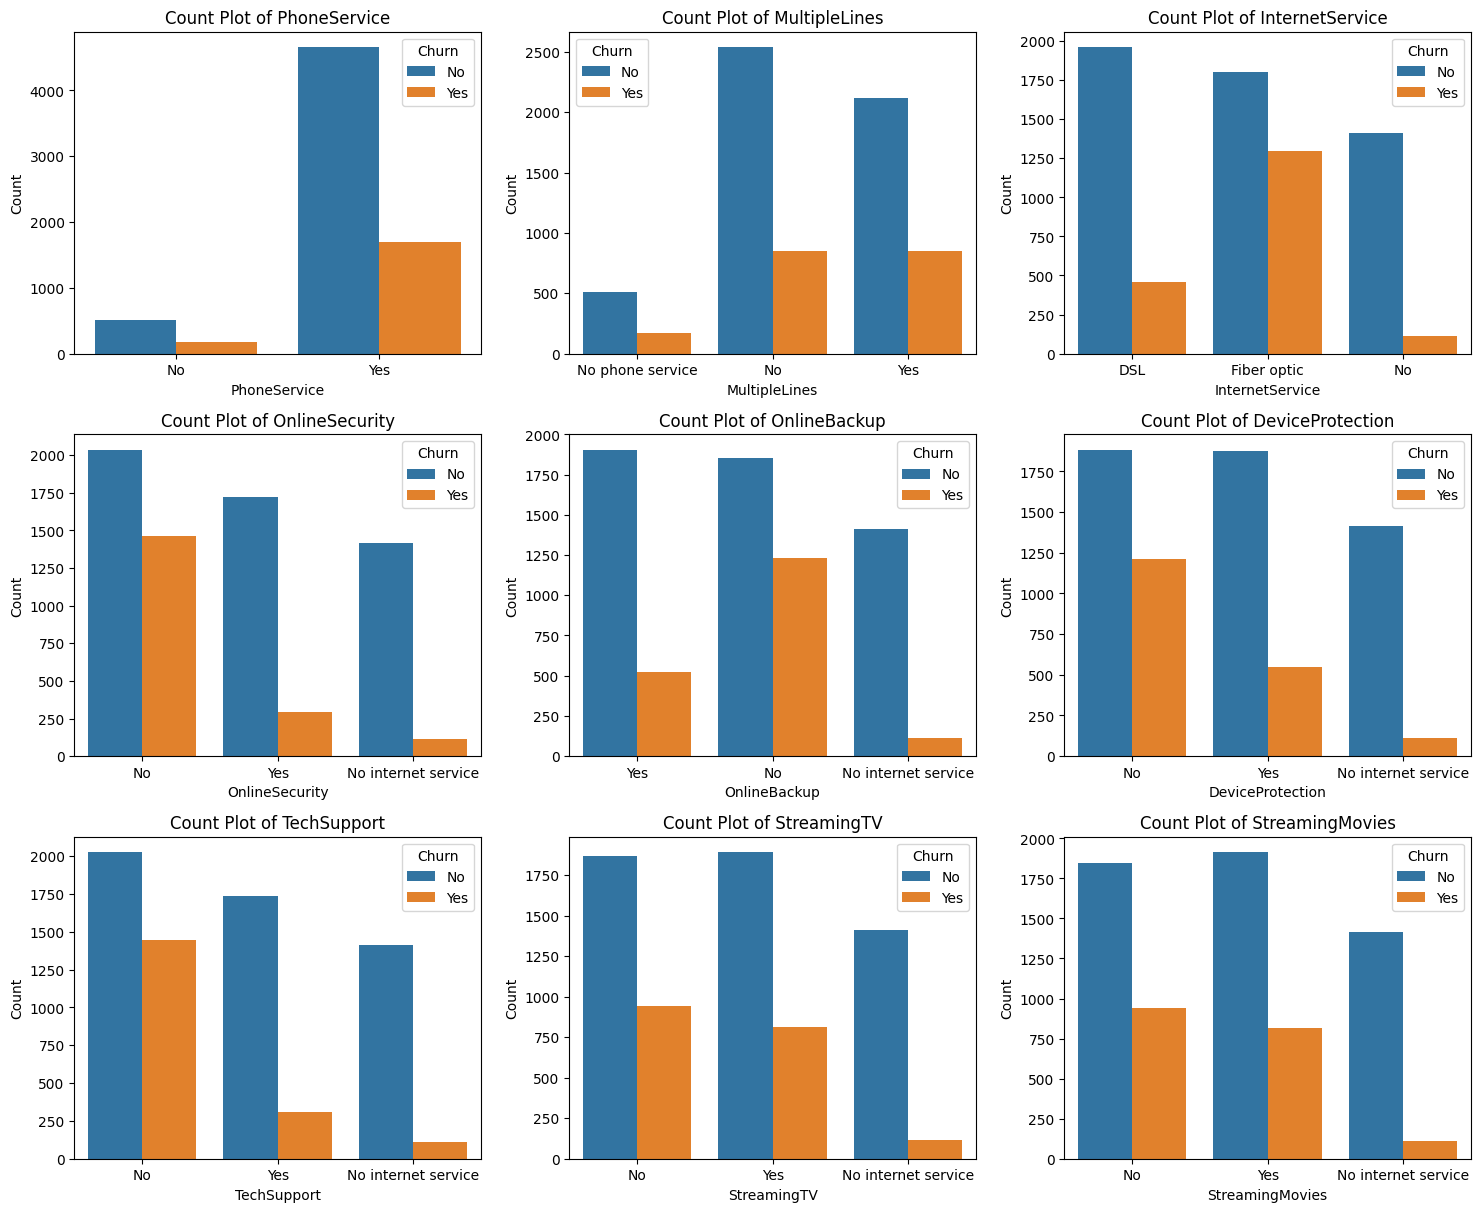

In [6]:

columns = [ 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols=3
n_rows=math.ceil(len(columns)+n_cols-1)

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col,data=df,ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# The majoriy of customers who do not churn tend to have services like PhoneService,..., churn rates are noticeably higher when these services are not used or are unavailable

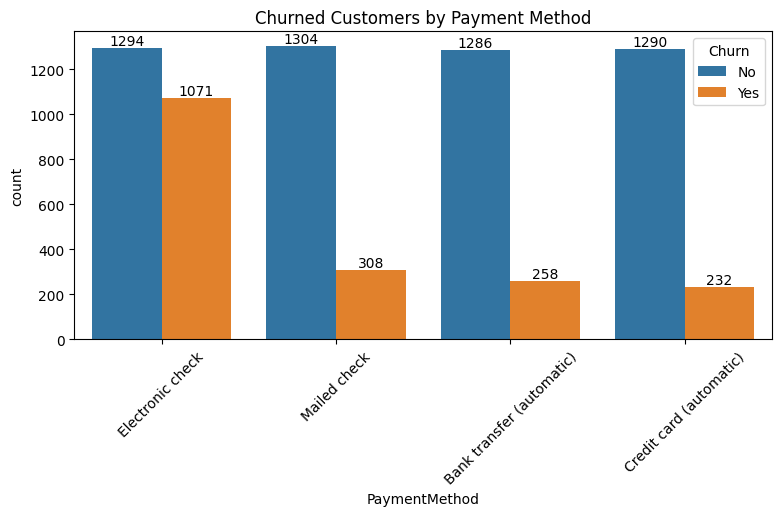

In [15]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()